# Statistics

## 1.1 Sales for the past week was the following amounts: `[3505, 2400, 3027, 2798, 3700, 3250, 2689]`. **Without using library functions**, what is the ***mean, variance, and standard deviation*** of sales from last week? (**`for extra bonus points, write your own function that can calculate these two values for any sized list`**)

### importing libaries. 

In [0]:
# going to implement importing libraries as needed or at somepoint your going to import libraries that are not needed. 
# to avoid this Just make a subheading for importing libraries. 
import math
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

### attemping to find: without using library functions 

1. mean

2. variance

3. standard deviation

of 

***sales from last week data***

In [0]:
# hard coding in the sales data from last week. (sales_lw)
sales_lw = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

#### mean:

[equation](https://imgur.com/a/r9VWwMV)

In [4]:
# mean: 
total = sum(sales_lw)
mean_sales_lw = total / len(sales_lw)
print("mean of sales last week: ", mean_sales_lw)

mean of sales last week:  3052.714285714286


#### variance: 

[equation](https://imgur.com/a/0Q96WQm)

##### way 1: 


In [5]:
# variance: generating functions to help do math. 
def subracted_mean(number):
  return number-mean_sales_lw

lambda n: n-mean_sales_lw

<function __main__.<lambda>>

In [0]:
# variance: trying to map the distances. 
distances = list(map(subracted_mean, sales_lw ))
# variance: summing and squaring things up. 
squared_distances = list(map(lambda n: n**2, distances))
# variance: length of list 
list_length = len(squared_distances)

In [7]:
# variance: final calculation
variance_sales_lw = sum(squared_distances)/list_length
print('{:.3f}'.format(variance_sales_lw, 3))

183761.061


##### way 2: the better faster way than lecture. 

In [8]:
variance  = sum(pow(x-mean_sales_lw,2) for x in sales_lw) / len(sales_lw)
print("the variance is: ", '{:.3f}'.format(variance, 3))

the variance is:  183761.061


#### standard deviation:

[equation](https://imgur.com/a/ahHvVdB)

In [9]:
# standard deviation: done. 
std  = math.sqrt(variance)
print("the standard deviation is: ", '{:.3f}'.format(std, 3))

the standard deviation is:  428.674


## 1.2 Find the ***covariance between last week's sales numbers and the number of customers that entered the store last week***: `[127, 80, 105, 92, 120, 115, 93]` (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [10]:
# setting up the dataframe. 
entered_lw = [127, 80, 105, 92, 120, 115, 93]
print("the co-variance is: ", '{:.2f}'.format(np.cov(sales_lw, entered_lw)[0][1]))

the co-variance is:  7604.36


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [11]:
# calculating the standard deviation of sales_lw and entered_lw 
# making a pandas df first. 
biz_df = pd.DataFrame({'sales_lw': sales_lw})
biz_df['entered_lw']=pd.Series(entered_lw)

# standard deviation
std_s = biz_df['sales_lw'].std(ddof=1)
std_e = biz_df['entered_lw'].std(ddof=1)

# calculating correlation coefficient 
cov_se = biz_df['sales_lw'].cov(biz_df['entered_lw'])
denom = std_s*std_e
corr_se = cov_se/denom
print("the correlation coefficient is: ", corr_se)

the correlation coefficient is:  0.9628339778148909


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [12]:
# importing the cleaned titanic dataframe. 
url = 'https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv'
clean_t_df = pd.read_csv(url)
clean_t_df.head(10)

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,6,1.0,1.0,"Anderson, Mr. Harry",male,48.0000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.0000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.0000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.0000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [13]:
# covariance matrix
clean_t_df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [14]:
# correlation matrix
clean_t_df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

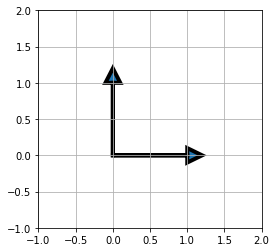

In [15]:
# hard coding in the "pependicular" unit vector
a = [1 , 0 ]
b = [0 , 1 ]

# code to generate some accepatable background
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Plot the vectors
for vect in [a, b]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
# hard coding in the test vectors 
test_a = [-5, 3, 7]
test_b = [6, -5, 2]

### defintion of orthogonality: 

[`It is “by definition”. Two non-zero vectors are said to be orthogonal when (if and only if) their dot product is zero.`](https://towardsdatascience.com/why-is-the-inner-product-of-orthogonal-vectors-zero-88469043decf)

In [17]:
# If dot product = 0, then vectors are orthogonal.
np.dot(test_a, test_b)
# not orthogonal

-31

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
# hard coding in the value of c: 
c = [2, -15, 6, 20]

In [19]:
# the norm of c, squared. 
from numpy import linalg as LA
norm_c=LA.norm(c)
norm_c_squared = math.pow(norm_c, 2)
print("the norm of c-squared is: ", norm_c_squared)

the norm of c-squared is:  665.0


In [20]:
# dot product of c. 
dot_c = np.dot(c,c)
print("the dot product of c and c is: ", dot_c)

the dot product of c and c is:  665


In [21]:
# the transpose of c multiplied with c. 
trans_c = np.transpose(c)
math = np.matmul(trans_c, c)
print("the multiplication of c and the transpose of c is: ", math)

the multiplication of c and the transpose of c is:  665


In [22]:
trans_c

array([  2, -15,   6,  20])

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
\textrm{a linear combination of vectors in two dimensional space can be re-writtten using $\hat{i}$ and $\hat{j}$.}
\end{align}

\begin{align}
d = 7\hat{i} + 12\hat{j}
\end{align}

\begin{align}
\textrm{a recombination using three dimensions can be written by a combination of $\hat{i}$, $\hat{j}$, and $\hat{k}$}
\end{align}

\begin{align}
e = 2\hat{i} + 11\hat{j} - 8\hat{k}
\end{align}

\begin{align}
\textrm{such that $\hat{i}$, $\hat{j}$, and $\hat{k}$ equals:}
\end{align}

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/99a93f8092c6792fdfa980eaa0508409915942ee)


## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}


\begin{align}
\textrm{a unit vector is defined such that:}
\end{align}


![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/82e612dbbbf9e58131a969de3634c5794e686ec9)

\begin{align}
\textrm{where |u| is the norm (or length) of u.}
\end{align}

\begin{align}
\textrm{The term normalized vector is sometimes used as a synonym for unit vector.}
\end{align}

In [23]:
# hard coding the value of the matrix f. 
f = [4, 12, 11, 9, 2]

# hard coding the norm of f
norm_f = np.linalg.norm(f)

# the unit vector f. 
unit_f = np.divide(f, norm_f)
print("The unit vector f is: ", unit_f)

The unit vector f is:  [0.20908335 0.62725005 0.57497921 0.47043754 0.10454167]


# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

#### theory: 
To determine if a set of vectors is linearly dependent or independent, we almost always use the method illustrated in Example 1: Set the linear combination equal to 0 and find the solutions.

![Example 1](https://i.imgur.com/irLw3BO.png)

### two dimensional vectors that linearly dependent: 

unit vector = $[[1, 0], [0, 1]]$

### two dimensional vectors that are linearly independent: 

vector $v$ = $[[1, -5],[2, 3]]$

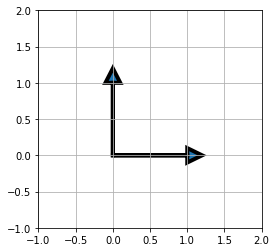

In [24]:
# hard coding in the "pependicular" unit vector
a_1 = [1 , 0 ]
b_1 = [0 , 1 ]

# code to generate some accepatable background
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,2)          
plt.ylim(-1,2)

# Plot the vectors
for vect in [a_1, b_1]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)
plt.show()

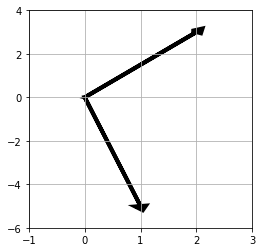

In [25]:
# hard coding in the "pependicular" unit vector
a_3 = [1 , -5 ]
b_3 = [2 , 3 ]

# code to generate some accepatable background
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,3)          
plt.ylim(-6,4)

# Plot the vectors
for vect in [a_3, b_3]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

![text example](https://i.imgur.com/IxEyuoi.png)

In [0]:
# hardcoding the vectors as numpy arrays 
g = np.array([1,2])
h = np.array([4,8])

In [27]:
# This is one possible linear combination:
s,t=(2,3)
linear_combo= np.multiply(g, s) + np.multiply(h, t) 
print(linear_combo)

[14 28]


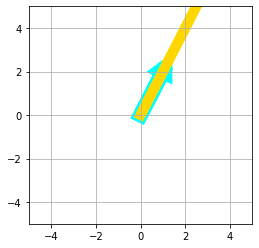

In [28]:
# Plot them on a grid
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-5,5)          
plt.ylim(-5,5)

# Display

# Plot the vectors
for myvect, mycolor, width in [(g, 'cyan', 15), (h, 'crimson', 5), (linear_combo, 'gold', 10)]:
  plt.arrow(0,0,
            myvect[0],
            myvect[1],
            head_width=.2,
            head_length=0.2,
            linewidth=width,
            color=mycolor)

In [29]:
# This is a set of several linear combinations:
muchos_combos=[]
for (s,t) in [(2,3), (4,5), (6,7), (8,9)]:
    linear_combo = np.multiply(g, s) + np.multiply(h, t) 
    muchos_combos.append(linear_combo)
print(muchos_combos)

[array([14, 28]), array([24, 48]), array([34, 68]), array([44, 88])]


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [32]:
# the question can be approached to figure out what space the 3 vectors span. 
# to do this take a cyclical crossproduct of each other, if they are linearlly independent, then they span a full coordinate space in R3. 
# ie, 1,2,3 cooridnate spaces, either a line, a plan or the entirity of R3 is spanned. 

l_test = [1, 2, 3]
m_test = [-1, 0, 7]
n_test = [4, 8, 2]

cross_lm = np.cross(l_test, m_test)
cross_mn = np.cross(m_test, n_test)
cross_ln = np.cross(l_test, n_test)

print("the cross product of l and m is: ", cross_lm)
print("the cross product of m and n is: ", cross_mn)
print("the cross product of l and n is: ", cross_ln)

the cross product of l and m is:  [ 14 -10   2]
the cross product of m and n is:  [-56  30  -8]
the cross product of l and n is:  [-20  10   0]


#### On the notion that the above 3 vectors lie in a manner such that each vector is linearlly independent of each other, it can be simplified such that. 
These vectors span $R^3$

# Basis.


![Definition](https://i.imgur.com/7rB3jFP.png)

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$

This in essence can be boiled down into a simple vector such that. you have a linear combination of a set $x_1$ and $x_2$ and the unit vector $\hat{i}$ and $\hat{j}$. such that. 

the following vector: 

\begin{align}
n = x_1*\hat{i} + x_2*\hat{j}
\end{align}

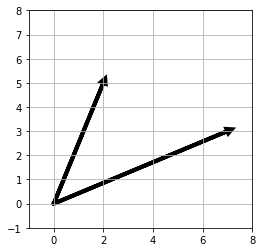

In [33]:
# hard coding in the "pependicular" unit vector
a_basis = [2 , 5 ]
b_basis = [7 , 3 ]

# code to generate some accepatable background
fig, ax = plt.subplots(figsize=(4,4))
ax.grid()
plt.xlim(-1,8)          
plt.ylim(-1,8)

# Plot the vectors
for vect in [a_basis, b_basis]:
  plt.arrow(0,0, vect[0], vect[1], head_width=.2, head_length=.2, linewidth=4)
plt.show()

## 6.2 What does it mean to form a basis?

#### answered above 6.1, 

put way simply. **a basis is a collection of elements in a vector space.** 

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# hard coding p as a numpy array. 
p = [l_test, m_test, n_test]
num_p = np.array(p)

In [35]:
# finding the rank using the library in numpy. 
np.linalg.matrix_rank(p)

# a rank of three indicates all rows are independent. 

3

## 7.2 What does the rank of a matrix tell us?

![theorem of linear alg](https://i.imgur.com/TCu34vo.png)

In [0]:
# this shows us that the rank of a matrix in essence is the number of rows that are linearly independent. 

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [0]:
# Hard coding the vector into a numpy array. 
v = np.array([2,1])
w = np.array([-3,3])

In [0]:
# Take all of the logical dot product
w_dot_v = np.dot(w,v)
v_dot_v = np.dot(v,v)

In [0]:
# The projection: 
fraction = w_dot_v/v_dot_v
projection = np.multiply(fraction,v)

# the direction of "light", or the line orthogonal to L. 
dirr = projection - w

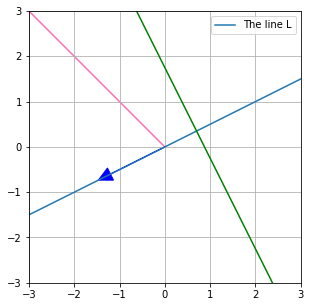

In [44]:
# code to generate some accepatable background
fig, ax = plt.subplots(figsize=(6,5))
ax.grid()
plt.xlim(-3,3)          
plt.ylim(-3,3)
axes = plt.gca()
axes.set_aspect('equal')

# Plot the vectors: calculating the slope of the line L, which is formed by the scaling of v. 
x_val = np.array(axes.get_xlim())
y_val = v[1]/v[0] * x_val
b_cept = dirr[1] / dirr[0] * x_val + 1.75  

# drawing out said line: using matplotlib -- this was not made clear during class. 
plt.plot(x_val, y_val, '-', label="The line L")
plt.plot(x_val, b_cept, '-', color='green')
plt.arrow(0, 0, w[0], w[1], head_width=.3, head_length=.3, color='hotpink')
plt.arrow(0, 0, projection[0], projection[1], head_width=.3, head_length=.3, 
          color='blue')

plt.legend();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

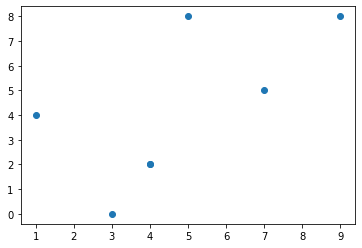

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()